In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
%load_ext autoreload

In [2]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2024-02-29 11:18:39,762 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-02-29 11:18:39,765 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2024-02-29 11:18:42,582 - matplotlib - DEBUG - matplotlib data path: /cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2024-02-29 11:18:42,600 - matplotlib - DEBUG - CONFIGDIR=/cmnfs/home/z.xiao/.config/matplotlib
2024-02-29 11:18:42,605 - matplotlib - DEBUG - interactive is False
2024-02-29 11:18:42,606 - matplotlib - DEBUG - platform is linux
2024-02-29 11:18:42,783 - matplotlib - DEBUG - CACHEDIR=/cmnfs/home/z.xiao/.cache/matplotlib
2024-02-29 11:18:42,836 - matplotlib.font_manager - DEBUG - Using fontManager instance from /cmnfs/home/z.xiao/.cache/matplotlib/fontlist-v330.json


# Load data

In [3]:
txt_path = "/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/"
msms_df = pd.read_csv(os.path.join(txt_path, "msms.txt"), sep="\t")

/tmp/ipykernel_90934/42633509.py:2: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  msms_df = pd.read_csv(os.path.join(txt_path, "msms.txt"), sep="\t")


In [5]:
msms_df.head()

,Raw file,Scan number,Scan index,Sequence,Length,Missed cleavages,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,...,Reverse,All scores,All sequences,All modified sequences,id,Protein group IDs,Peptide ID,Mod. peptide ID,Evidence ID,Oxidation (M) site IDs
0,BBM_647_P241_02_07_ssDDA_MIA_004,8461,7768,AAAAEIAVK,9,0,Unmodified,_AAAAEIAVK_,NaN,NaN,...,NaN,69.8246066869863;35.2952538007438;28.174025403...,AAAAEIAVK;NDAILVAK;AAIAAEVAK,_AAAAEIAVK_;_NDAILVAK_;_AAIAAEVAK_,0,384,0,0,0,NaN
1,BBM_647_P241_02_07_ssDDA_MIA_005,8471,7770,AAAAEIAVK,9,0,Unmodified,_AAAAEIAVK_,NaN,NaN,...,NaN,73.6646353084277;43.8078020897056;36.395170339887,AAAAEIAVK;NDAILVAK;AAIAAEVAK,_AAAAEIAVK_;_NDAILVAK_;_AAIAAEVAK_,1,384,0,0,1,NaN
2,BBM_647_P241_02_07_ssDDA_MIA_001,9374,8634,AAADEWDER,9,0,Unmodified,_AAADEWDER_,NaN,NaN,...,NaN,145.648489875395;3.3921643866591,AAADEWDER;DDEEYHVR,_AAADEWDER_;_DDEEYHVR_,2,1208,1,1,2,NaN
3,BBM_647_P241_02_07_ssDDA_MIA_002,9341,8594,AAADEWDER,9,0,Unmodified,_AAADEWDER_,NaN,NaN,...,NaN,163.202594227336;4.35631285626958,AAADEWDER;DDEEYHVR,_AAADEWDER_;_DDEEYHVR_,3,1208,1,1,3,NaN
4,BBM_647_P241_02_07_ssDDA_MIA_003,9331,8582,AAADEWDER,9,0,Unmodified,_AAADEWDER_,NaN,NaN,...,NaN,151.495376157055;4.35631285626958,AAADEWDER;DDEEYHVR,_AAADEWDER_;_DDEEYHVR_,4,1208,1,1,4,NaN


In [6]:
msms_exp1_df = msms_df[msms_df["Raw file"] == "BBM_647_P241_02_07_ssDDA_MIA_001"]

In [7]:
ms1_scans_df = pd.read_csv(os.path.join(txt_path, "msScans.txt"), sep="\t")
ms2_scans_df = pd.read_csv(os.path.join(txt_path, "msmsScans.txt"), sep="\t")

In [8]:
ms1_scans_df.head()

,Raw file,Scan number,Scan index,Retention time,Cycle time,Ion injection time,Base peak intensity,Total ion current,MS/MS count,Mass calibration,...,Multiplets / s,Identified multiplets / s,Multiplet identification rate [%],MS/MS / s,Identified MS/MS / s,MS/MS identification rate [%],Intens Comp Factor,CTCD Comp,RawOvFtT,AGC Fill
0,BBM_647_P241_02_07_ssDDA_MIA_001,1,0,0.002818,0.13836,2.2,304110,2776300,0.0,-2.2526,...,8.003,1.418,17.72,12.66,2.252,17.79,NaN,NaN,20807.6,1.00
1,BBM_647_P241_02_07_ssDDA_MIA_001,2,1,0.005124,0.13834,2.2,277790,3107300,0.0,-2.2526,...,8.002,1.417,17.71,12.65,2.251,17.79,NaN,NaN,19506.3,1.00
2,BBM_647_P241_02_07_ssDDA_MIA_001,3,2,0.007430,0.13838,50.0,164750,3081500,0.0,-2.2526,...,8.000,1.417,17.71,12.64,2.250,17.79,NaN,NaN,326321.3,0.11
3,BBM_647_P241_02_07_ssDDA_MIA_001,4,3,0.009736,0.13939,50.0,164120,3027300,0.0,-2.2526,...,7.998,1.416,17.70,12.64,2.249,17.80,NaN,NaN,321359.6,0.72
4,BBM_647_P241_02_07_ssDDA_MIA_001,5,4,0.012059,0.13835,50.0,158160,2998300,0.0,-2.2526,...,7.996,1.415,17.69,12.63,2.248,17.80,NaN,NaN,317618.3,0.78


In [9]:
ms2_scans_df.head()

,Raw file,Scan number,Retention time,Ion injection time,Total ion current,Collision energy,Summations,Base peak intensity,Elapsed time,Identified,...,Proteins,Score,Experiment,Intens Comp Factor,CTCD Comp,RawOvFtT,AGC Fill,Scan index,MS scan index,MS scan number
0,BBM_647_P241_02_07_ssDDA_MIA_001,39,0.090895,32.0,333000,28,0,179260.0,NaN,-,...,,NaN,1,NaN,NaN,10556.3,0.01,0,37,38
1,BBM_647_P241_02_07_ssDDA_MIA_001,40,0.091671,32.0,414790,28,0,106230.0,NaN,-,...,,NaN,1,NaN,NaN,14693.4,0.01,1,37,38
2,BBM_647_P241_02_07_ssDDA_MIA_001,41,0.092396,32.0,131440,28,0,27357.0,NaN,-,...,,NaN,1,NaN,NaN,6674.9,0.01,2,37,38
3,BBM_647_P241_02_07_ssDDA_MIA_001,42,0.093120,32.0,114990,28,0,41049.0,NaN,-,...,,NaN,1,NaN,NaN,5185.0,0.01,3,37,38
4,BBM_647_P241_02_07_ssDDA_MIA_001,43,0.093844,32.0,157550,28,0,81491.0,NaN,-,...,,NaN,1,NaN,NaN,8048.8,0.01,4,37,38


In [10]:
ms1_scans_exp1_df = ms1_scans_df[
    ms1_scans_df["Raw file"] == "BBM_647_P241_02_07_ssDDA_MIA_001"
]
ms2_scans_exp1_df = ms2_scans_df[
    ms2_scans_df["Raw file"] == "BBM_647_P241_02_07_ssDDA_MIA_001"
]

([<matplotlib.patches.Wedge at 0x7fe361e9ff40>,
 [Text(1.080403427608183, 0.20670857169573256, 'Number of MS1 scans'),
  Text(-1.0804034348657274, -0.20670853376273113, 'Number of MS2 scans')],
 [Text(0.5893109605135544, 0.11275013001585411, '6.0%\n(2420)'),
  Text(-0.5893109644722149, -0.11275010932512605, '94.0%\n(37797)')])

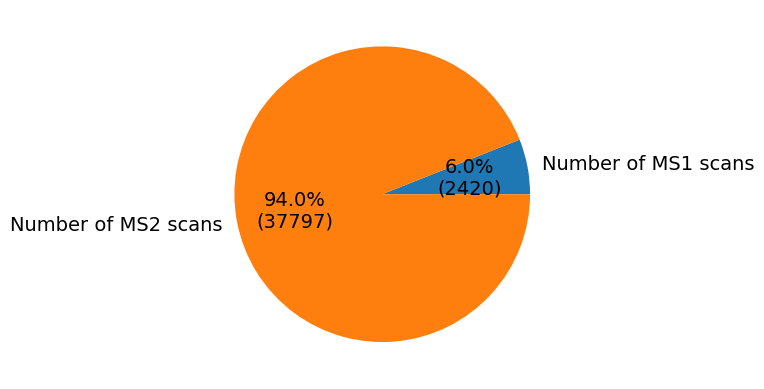

In [18]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
fig, ax = plt.subplots()


def func(pct, allvals):
    absolute = int(np.round(pct / 100.0 * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


data = [2420, 37797]

ax.pie(
    data,
    labels=["Number of MS1 scans", "Number of MS2 scans"],
    autopct=lambda pct: func(pct, data),
)